In [27]:
import numpy as np
import matplotlib.pyplot as plt

## Atmosphere
Following 9905369, first calculate the Fourier transform of the swept beam, the one that SPT uses:
$$ G(\vec\alpha) = \sum_{i=1}^N\, \int d^2\theta e^{i\vec\alpha\cdot \vec\theta} \,e^{-(\vec\theta_i-\vec\theta)^2/2\sigma^2}$$
where
$$\vec\theta_i = [-\frac{N\theta_b}{4} + i\theta_b/2,0].$$
That's roughly right as long as $\theta_b\ll \theta_s$. 

The $\theta_y$ integral can be done:
$$ \int d\theta_y e^{i\theta_y\alpha_y} e^{-\theta_y^2/2\sigma^2}\propto e^{-\sigma^2\alpha_y^2/2}$$
The $\theta_x$ integral also gives this factor but then an additional factor of
$$ \sum_{j=1}^N e^{i \alpha_x \theta_j} = \sum_{j=1}^N e^{ijx}$$ where $x\equiv \alpha_x\theta_b/2$. The sum yields (again apart from a phase)
$$ \frac{1-e^{-iNx}}{1-e^{-ix}} $$ which, when squared becomes
$$\left| G(\vec\alpha)\right|^2 = e^{-\sigma^2\alpha^2} \frac{1-\cos(Nx)}{1-\cos(x)} $$

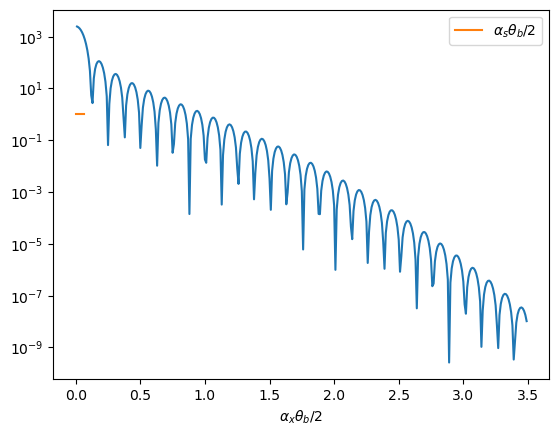

In [28]:
#plot this at $\alpha_y=0$, taking \theta_b/2=\sigma:
x=np.arange(0.01,3.5,.01)
N=50
y = 1./np.log(2.)
plt.plot(x,np.exp(-y*x**2)*(1-np.cos(N*x))/(1.-np.cos(x)))
plt.yscale('log')
plt.xlabel('$\\alpha_x\\theta_b/2$')
#thetas=N*
plt.plot([0,np.pi/N],[1,1],label='$\\alpha_s\\theta_b/2$')
plt.legend()



## From chatgpt:
If the wind is stable, the time it takes for water vapor in the atmosphere to deviate from the direction initially propelled by the wind (due to the Coriolis force) depends on several factors, including the wind speed, the latitude (near the South Pole in this case), and the scale of motion.


The Coriolis acceleration is given by:
$
a_c = 2 \Omega v \sin\phi
$
Where:
 $ \Omega $ is the Earth's angular velocity ($7.292 \times 10^{-5} \, \text{rad/s}$),
   $ v $ is the wind speed,
  $ \phi $ is the latitude (near the South Pole, $ \phi \approx -90^\circ $, so $ \sin\phi \approx -1 $).


The trajectory's deviation due to the Coriolis force follows a \textbf{curved path} rather than a straight line. The characteristic time scale over which significant deviation occurs is the \textbf{inertial period}:
$
T = \frac{2\pi}{2\Omega \sin\phi}
$

For the South Pole ($ \sin\phi = -1 $):
$
T = \frac{2\pi}{2\Omega} = \frac{\pi}{\Omega} \approx \frac{3.1416}{7.292 \times 10^{-5}} \approx 43,200 \, \text{seconds} = 12 \, \text{hours}.
$

The inertial period ($ \sim 12 \, \text{hours} $) represents the time it takes for a parcel of air (or water vapor) to complete a half-turn due to the Coriolis force in the absence of other forces.
   \textbf{Initial Deviation:} Even within minutes to hours, the trajectory begins curving slightly. However, noticeable deviation requires several hours.

The \textbf{distance traveled before significant deviation} depends on the wind speed:
$
d = v \cdot t
$

For example, if $ v = 10 \, \text{m/s} $ and we want to know the distance covered in half the inertial period ($6 \, \text{hours}$):
$
d = 10 \, \text{m/s} \cdot 6 \cdot 3600 \, \text{s} = 216,000 \, \text{m} = 216 \, \text{km}.
$

At this point, the parcel would have noticeably deviated from its initial path.




## Impact of wind on time dependence
The Halverson paper says: A fluctuation component characterized by wavenumbers($q_x, q_y$) sampled along a line of sight parallel to the z-axis produces
a signal that varies in time with frequency $\nu= w_xq_x + w_yq_y$. Suppose a given fluctuation is a single plane wave that varies only along the x-axis with wavelength $1/q$. Then, the assumption is that it is moving with $w$. The relation between speed, wavelength and frequency is $$ \nu=\frac{w}{\lambda} = wq$$ as claimed.

Table 1 in the Halverson paper suggests that they are considering the height of the water vapor to be of order a km. If so, then 1 arcminute 
corresponds to $(x/10^3m) = \pi/(180*60)=0.29$m. 

In [29]:
print(np.pi*1.e3/180/60)

0.29088820866572157


.29 m in the y-direction is travelled in how much time? The radius of the orbit is $R=wT/2\pi$, and the motion is $x=R\sin(2\pi t/T)$ and $y=R[1-\cos(2\pi t/T)]$ In a very small time, the y-distance traveled is $R(2\pi t/T)^2/2=\pi wt^2/T$. This distance is equal to .29m when $t=\sqrt{.29m T/w\pi}$

In [31]:
print(np.sqrt(.29*12*3600/(np.pi*5)))

28.241056120869594


So, if the wind speed is 5m/s, the parcel will deviate 1' from the straight direction in only 28s

More generally, for wind blowing in the $x-$direction with speed $w$, the Coriolis force will lead to a preprendicular displacement,
$$ y_{cor} = \pi w t^2/T$$
where $T=\frac{\pi}{\omega_{E} \sin\lambda} =  4.3\times 10^4\,s\, \frac1{\sin\lambda}$. This leads to a angular displacement (in the perpendicular direction of 
$$ \delta\theta_{cor} = \frac{\pi w t^2}{Th}=0.15'' \left(\frac{w}{10m/s}\right)\,\left(\frac{t}{1\,sec}\right)^2\,\left(\frac{1\,km}{h}\right)\,\left(\sin\lambda\right)$$
where $h$ is the altitude of the atmospheric parcel responsible for the scattering/emission.


# Fourier transform of time stream filter:
$$ \tilde Q(\vec\alpha) = \frac1\tau\,\int_{-\tau/2}^{\tau/2} dt\,e^{i\vec\alpha\cdot \vec\theta(t)} .$$
This comes from noticing that $T(\vec\theta,t)=T(\vec\theta-\vec w t)$ and then rescaling the $\vec\theta$ integral $\rightarrow \vec\theta'\equiv\vec\theta -\vec\theta(t)$. In our case, the velocity is
$$\vec w(t) = \vec w_0 + \hat y w_0 2\pi t/T\equiv w_0 \left( \hat x + \hat y \delta t\right)$$
assuming $\vec w_0$ is in the x-direction. Here $\delta\equiv 2\pi/T\simeq 1.5\times 10^{-4}$Hz. So,
$$\tilde Q(\vec\alpha) \simeq \frac1\tau\,\int_{-\tau/2}^{\tau/2}\,dt\,e^{i\alpha_xw_0t} \left[ 1  + i\alpha_y w_0\delta t^2\right].$$
The first integral gives 
$$\tilde Q_0 = \sinc(\alpha_xw_0\tau/2).$$
The second term is
$$ \frac{i\alpha_y w_0\delta}\tau\, \int_{-\tau/2}^{\tau/2}  dt\,e^{i\alpha_xw_0t}  t^2
=
\frac{i\alpha_y\delta\tau}{\alpha_x}\,
\frac{w_0\alpha_x}{\tau^2}\int_{-\tau/2}^{\tau/2}  dt\,e^{i\alpha_xw_0t}  t^2.
$$
Define $y\equiv \alpha_xw_0 t$. Then, the integral becomes
$$
\int_{-\tau/2}^{\tau/2}  dt\,e^{i\alpha_xw_0t}  t^2 =
\frac1{(\alpha_xw_0)^3}\int_{-\beta/2}^{\beta/2} dy y^2 e^{iy}
$$
with $\beta\equiv \alpha_xw_0\tau$. So
$$\tilde Q_1 = \frac{i\alpha_y\delta\tau}{\alpha_x}\, \frac1{\beta^2}\int_{-\beta/2}^{\beta/2} dy y^2 e^{iy}$$
From chatgpt, this becomes:
$$ \frac{1}{\beta^2} \left[\frac{e^{i y}}{i} \left(y^2 - \frac{2y}{i} + \frac{2}{i^2}\right) 
\bigg|_{y = -\beta/2}^{y = \beta/2} 
\right] 
=
\sin(\beta/2)\left[\frac12 -\frac4{\beta^2}\right] + \frac2\beta\cos(\beta/2)$$

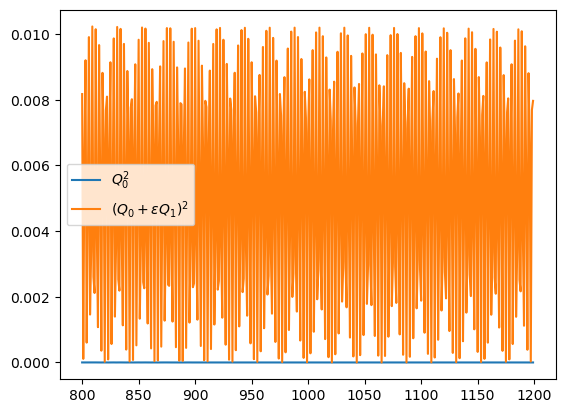

In [49]:
x=np.arange(800,1200,1)
q0=np.sin(x)/x
plt.plot(x,q0**2,label='$Q_0^2$')
q1=np.sin(x)*(.5-1/x**2)+np.cos(x)/x
eps=0.2
plt.plot(x,(q0+eps*q1)**2,label='$(Q_0+\epsilon Q_1)^2$')
plt.legend()



In [40]:
np.sin(30*3.14/180)

0.4997701026431024

In [43]:
1.55*1.e3*3.14/180/3600


0.007510802469135802